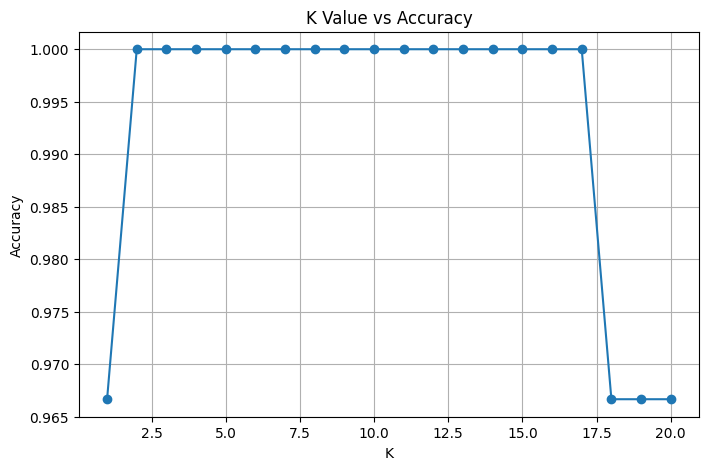

Best K based on accuracy: 2
Final Accuracy with K=2: 1.0000

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



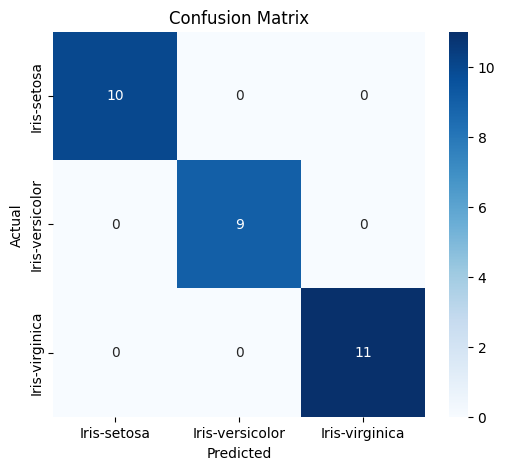

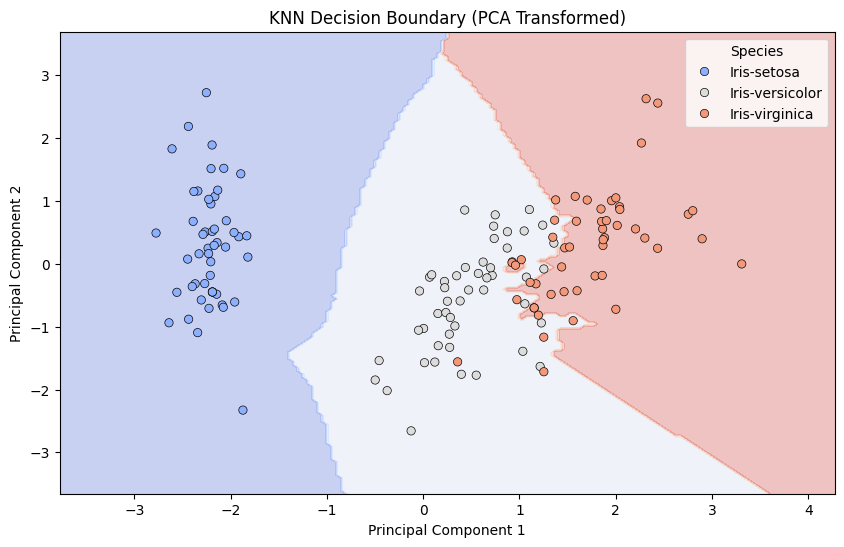

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# 1. Load Dataset
df = pd.read_csv("/content/Iris.csv")
df.drop("Id", axis=1, inplace=True)  # Drop ID column

# 2. Normalize Features
X = df.drop("Species", axis=1)
y = df["Species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Experiment with different K values
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot K vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("K Value vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("k_vs_accuracy.png")
plt.show()

# 5. Final Model with best K
best_k = k_range[np.argmax(accuracies)]
print("Best K based on accuracy:", best_k)

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Final Accuracy with K={}: {:.4f}".format(best_k, acc))
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# Save confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix.png")
plt.show()

# 6. Visualize Decision Boundaries using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model_pca = KNeighborsClassifier(n_neighbors=best_k)
model_pca.fit(X_train_pca, y_train_pca)

# Create meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Map class labels to integers for contourf
class_to_num = {label: idx for idx, label in enumerate(model_pca.classes_)}
Z_num = np.array([class_to_num[label] for label in Z])
Z_num = Z_num.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_num, alpha=0.3, cmap='coolwarm')

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', edgecolor='k')
plt.title("KNN Decision Boundary (PCA Transformed)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("decision_boundary.png")
plt.show()